In [21]:
%pylab
import importlib.util
import sys
sys.path.append('/home/ch/src/modulated-messages')
from receive import *
from decode import *
import config
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = [15, 9]

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


/home/ch/.local/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['fft']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [22]:
frequency = config.frequency
offset = config.offset
samp_rate = config.rec_samp_rate
baud = config.baud
samp_per_bit = samp_rate/baud

In [23]:
path = '/home/ch/src/modulated-messages/samples'
samples = np.load(f'{config.path}/rec.npy')

am_signal = np.load(f'{path}/am_signal.npy')
t = np.load(f'{config.path}/t.npy')

## Transmitted AM Signal

Text(0, 0.5, 'Amplitude')

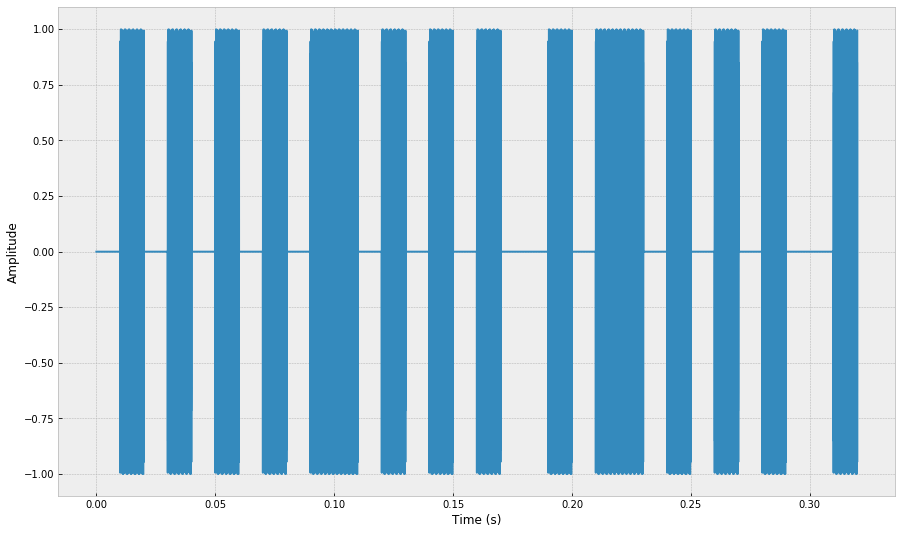

In [24]:
plt.plot(t, am_signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

## Received Signal

Text(0, 0.5, 'Amplitude')

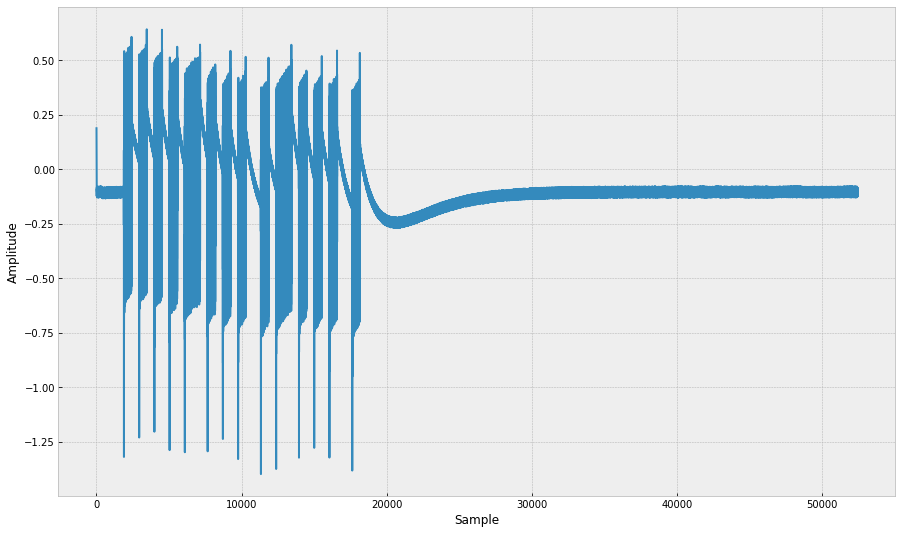

In [25]:
fm_demodulated_wave, new_samp_rate = fm_demodulate(samples, frequency, offset, samp_rate)
plt.plot(fm_demodulated_wave)
plt.xlabel('Sample')
plt.ylabel('Amplitude')

## FFT

Text(0, 0.5, 'Magnitude')

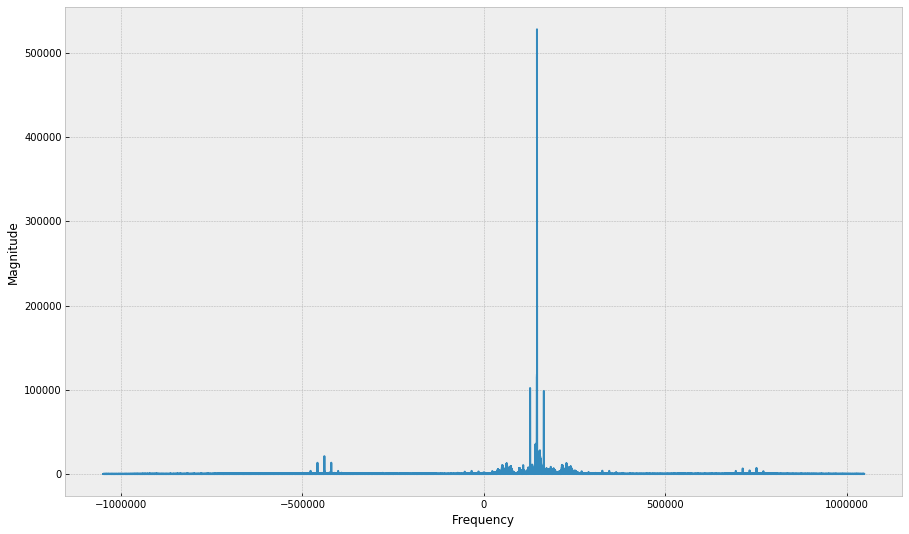

In [26]:
samples = samples[:samp_rate]
fft = scipy.fftpack.fft(samples)
freqs = scipy.fftpack.fftfreq(len(samples)) * samp_rate
plt.plot(freqs, np.abs(fft))
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

Text(0, 0.5, 'Amplitude')

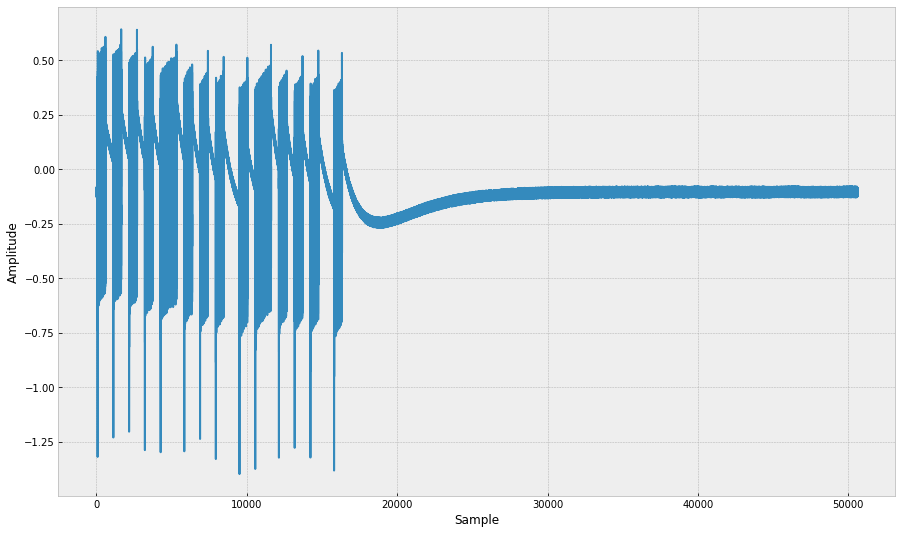

In [27]:
start = detect_transmission_start(fm_demodulated_wave)
end = len(fm_demodulated_wave) - detect_transmission_start(fm_demodulated_wave[::-1]) + 500
plt.plot(fm_demodulated_wave[start:])
plt.xlabel('Sample')
plt.ylabel('Amplitude')


## Envelope

Text(0, 0.5, 'Amplitude')

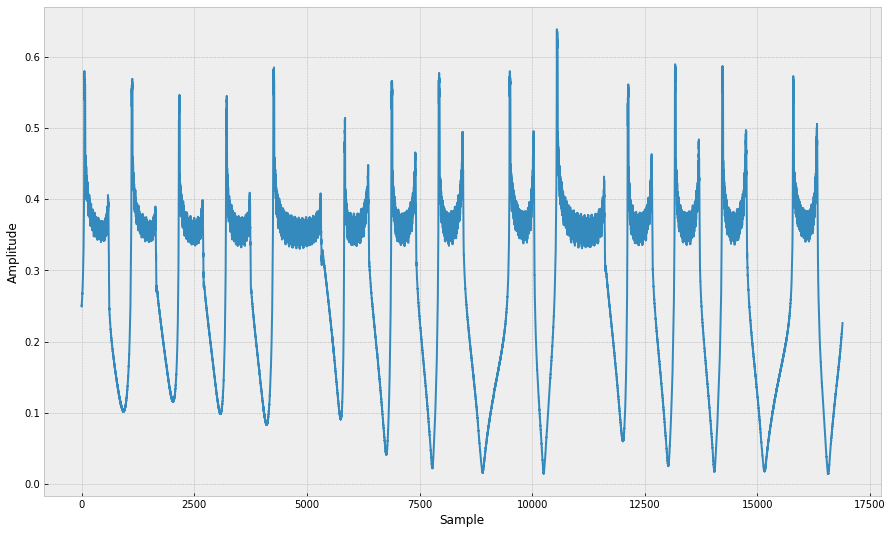

In [28]:
wave = fm_demodulated_wave[start:end]
samp_per_bit = new_samp_rate/baud
smoothed_wave = smooth(np.abs(wave), window_len=21, window='flat')
envelope = get_envelope(smoothed_wave)[10:-10]
plt.plot(envelope)
plt.xlabel('Sample')
plt.ylabel('Amplitude')

## Square wave

[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1]


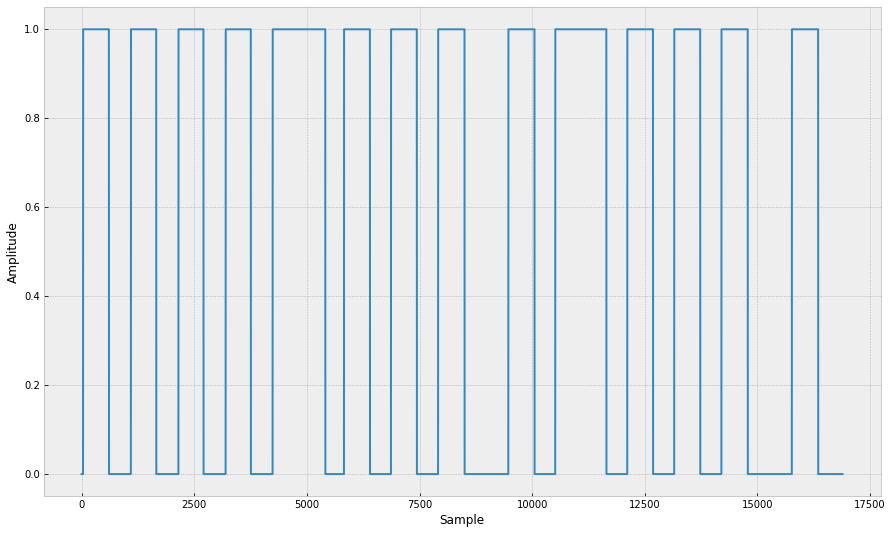

In [29]:
square_wave = binary_slicer(envelope)
plt.plot(square_wave)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
rec_bits = manchester(square_wave, samp_per_bit)
print(rec_bits)

In [10]:
valid, message, fragmented = demux(rec_bits)
print(message)

0
a
